# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *8p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning - Optional
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


##### Date initiale

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17799,40,Private,195394,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
6151,27,Private,39232,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7066,58,Local-gov,98361,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
3321,37,Private,189922,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
4134,38,Private,278253,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,48,United-States,<=50K
5948,39,Private,327435,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,36,United-States,>50K
13628,30,Private,154120,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,65,United-States,<=50K
861,43,Private,191547,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico,<=50K
26700,26,Self-emp-not-inc,102476,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,50,United-States,<=50K
7417,23,Private,273206,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,23,United-States,<=50K


##### Data preparation

In [8]:
# Preluare date

import pandas as pd

X_train = pd.read_csv("data\\X_train.csv")
X_test = pd.read_csv("data\\X_test.csv")
y_train = pd.read_csv("data\\y_train.csv").squeeze()
y_test = pd.read_csv("data\\y_test.csv").squeeze()

In [ ]:
# Verificare dimensiuni

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26029, 32), (6508, 32), (26029,), (6508,))

In [10]:
# Separam set-ul de testare

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
# Verificam ca datele sa fie numerice
X_train.info()

<class 'pandas.DataFrame'>
Index: 20823 entries, 15272 to 23654
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   education-num                  20823 non-null  float64
 1   sex                            20823 non-null  int64  
 2   income                         20823 non-null  int64  
 3   is_married                     20823 non-null  int64  
 4   capital_net                    20823 non-null  float64
 5   is_usa                         20823 non-null  int64  
 6   occupation_Armed-Forces        20823 non-null  bool   
 7   occupation_Craft-repair        20823 non-null  bool   
 8   occupation_Exec-managerial     20823 non-null  bool   
 9   occupation_Farming-fishing     20823 non-null  bool   
 10  occupation_Handlers-cleaners   20823 non-null  bool   
 11  occupation_Machine-op-inspct   20823 non-null  bool   
 12  occupation_Other-service       20823 non-null  bool   
 13

In [12]:
# Modificam datele pentru a fi numerice

X_train = X_train.astype(float)
X_val = X_val.astype(float)
X_test = X_test.astype(float)

In [ ]:
# Scalare date pentru a elimina diferentele dintre caracteristici

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

##### Model Selection and Setup

Am ales sa implementez multiple modele (Linear Regression, Decision Tree Regression, Random Forest Regression, Ridge Regression, Lasso Regression) pentru a putea prezice orele pentrecute la locul de munca, pentru a explora daca datele au nevoie de modele complexe sau nu si pentru a gasi cel mai optim raspuns.
Voi experimenta cu MSE (Mean Squared Error) deoarece penalizeaza erorile mai drastic din cauza ridicarii la patrat si forteaza modelul sa evite predictii diferite de realitate. Spre exemplu, variabila capital_net are o varianta foarte mare, iar MSE va forta modelul sa nu ignore persoanele cu venituri sau pierderi mari (considerate outliers) care ar putea influenta orele lucrate. MAE (Mean Absolute Error) deoarece stim deja ca datele prezinta outliers( doar o ora lucrata sau 99, venituri prea mari sau prea mici), aceasta metrice fiind mai robusta la valorile atipice. Ne va spne cu cate ore greseste modelul in medie pe saptamana, fara a distorsiona rezultatele din cauza cazurilor de ore extreme de munca lucrate. Ma voi uita si la RMSE (Root Mean Squared Error) deoarece readuce eroarea la aceeasi unitate de masura ca variabila target (orele), dar, spre deosebire de MAE, pastreaza sensibilitatea fata de erorile mari si este utila pentru a vedea daca modelul are "scapari" majore pe anumite segmente de date. Va fi folosit oentru a vedea daca modelul face erori de predictie in functie de anumite categorii ocupationale. R squared va fi folosit pentru a putea intelege cat la % a explicat modelul varianta datelor.

Linear Regression - bun pentru volumul mare de date
- Pro: control asupra procesului de invatare
- Cons: foarte sensibil la scalarea datelor si la outliers

Decision Tree Regression - Capteaza relatii non-liniare intre variabile, variabilele varsta si ore lucrate nu au o relatie liniara, avand un cumul mai mare de persoane de varsta medie care lucreaza 40 ore, in timp ce tinerii si persoanele varstince lucreaza diferit
- Pro: usor de interpretat, poate capta interactiuni intre mai multe variabile
- Cons: predispus la overfitting

Random Forest - Combina mai multi arbori pentru a stabiliza predictia, din cauza varietatii de variabile binare, un singur arbore ar putea fi instabil, in timp ce media mai multor arbori ofera alta perspectiva
- Pro: robust la outliers, reduce varianta si riscul de overfitting al unui singur arbore decizional
- Cons: consuma mai multe resurse si ofera black box greu de interpretat, lent pentru numarul mare de coloane din set (32)

Ridge Regression - Adauga o penalizare pentru a mentine coeficientii mici, unele ocupatii sa nu ofere informatii importante legate de numarul orelor lucrate
- Pro previne overfitting-ul in prezenta unor variabile corelate
- Cons: nu elimina variabile inutile, chiar daca, spre ex unele ocupatii nu influenteaza orele lucrate pe saptamana

Lasso Regression - Penalizare care poate forta coeficientii spre zero
- Pro: realizeaza selectie automata de variabile
- Cons: poate elimina variabile importante daca exista corelatie puternica, spre ex daca doua ocupatii sunt corelate, ar putea sterge una la intamplare si astfel modelul sa piarda informatii importante

##### Model training

Baseline model

In [14]:
#  Definim o functie pentru a calcula toate metricile

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np

def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [16]:
# Construim un model care arata performanta unui model fata de medie

from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
mae_b, mse_b, rmse_b, r2_b = get_metrics(y_val, dummy_regr.predict(X_val))

results = []
results.append({
    "Model": "Baseline (Mean)",
    "MAE": mae_b, "MSE": mse_b, "RMSE": rmse_b, "R2": r2_b
})

In [17]:
# Definim modelele pe care le vom testa

from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

trained_models = {
    "SGD_Regressor": SGDRegressor(random_state=42),
    "Decision_Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random_Forest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

for name, model in trained_models.items():
    # Antrenare
    model.fit(X_train, y_train)
    # Predictie pe setul de VALIDARE
    preds = model.predict(X_val)
    # Calcul metrici
    mae, mse, rmse, r2 = get_metrics(y_val, preds)
    # Salvare rezultate
    results.append({
        "Model": name,
        "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2
    })

In [23]:
# Setam formatul de afisare pentru float-uri la 3 zecimale

import pandas as pd
pd.options.display.float_format = '{:.3f}'.format

In [24]:
# Afisare rezultate

df_results = pd.DataFrame(results)
print(df_results.sort_values(by="MAE"))

             Model        MAE                  MSE         RMSE  \
3    Random_Forest      7.393              116.543       10.796   
0  Baseline (Mean)      7.496              150.155       12.254   
5            Lasso      7.523              118.257       10.875   
4            Ridge      7.574              118.104       10.868   
2    Decision_Tree      7.589              125.330       11.195   
1    SGD_Regressor 825936.991 1546673823734331.500 39327774.203   

                   R2  
3               0.224  
0              -0.000  
5               0.212  
4               0.213  
2               0.165  
1 -10300598207214.150  


In urma primei generari, putem observa ca modelul random forest a obtinut cele mai bune rezultate, aducand imbunatatiri fata de media simpla a datelor. MAE (7.393) ne arata ca modelul are o marja de eroare de aproximativ 7 ore si 20 de minute in numarul de ore lucrate pe saptamana. Totusi, precizia acestui rezultat nu este mare, ceea ce ne indica faptul ca, acest model mai de graba a aproximat orele, in loc sa fie exact. R squared ne indica faptul ca modelul reuseste sa explice 22.4%, un scor destul de mic, din variatia orelor de munca in functie de variabilele date. Avand in vedere MAE al Baseline, daca comparam celelalte modele, toate prezinta o valoare mai mare. Acest lucru ne arata faptul ca toate mpdelele acestea se complica inutil si dau rezultate negative. Faptul ca valoarea MAE este de 7 ore, iar MSE este peste 115, confirma prezenta valorilor extreme care afecteaza rezultatele. Valoarea RMSE este mai mare cu cel putin 3 unitati fata de MAE, ceea ce ne indica faptul ca modelul face greseli de predictie importante pe care nu le poate explica inca, in cazul Random forest eroarea fiind de aproximativ 11 ore. Comparativ cu media, modelul a reusit sa imbunatateasca rezultatul cu aproximativ 2 unitati, reducand astfel din greseli.
SGD Regressor a esuat complet, cel mai probabil din cauza unul learning pace prea mare si necesita o recalibrare a procesului de invatare.

Grafice

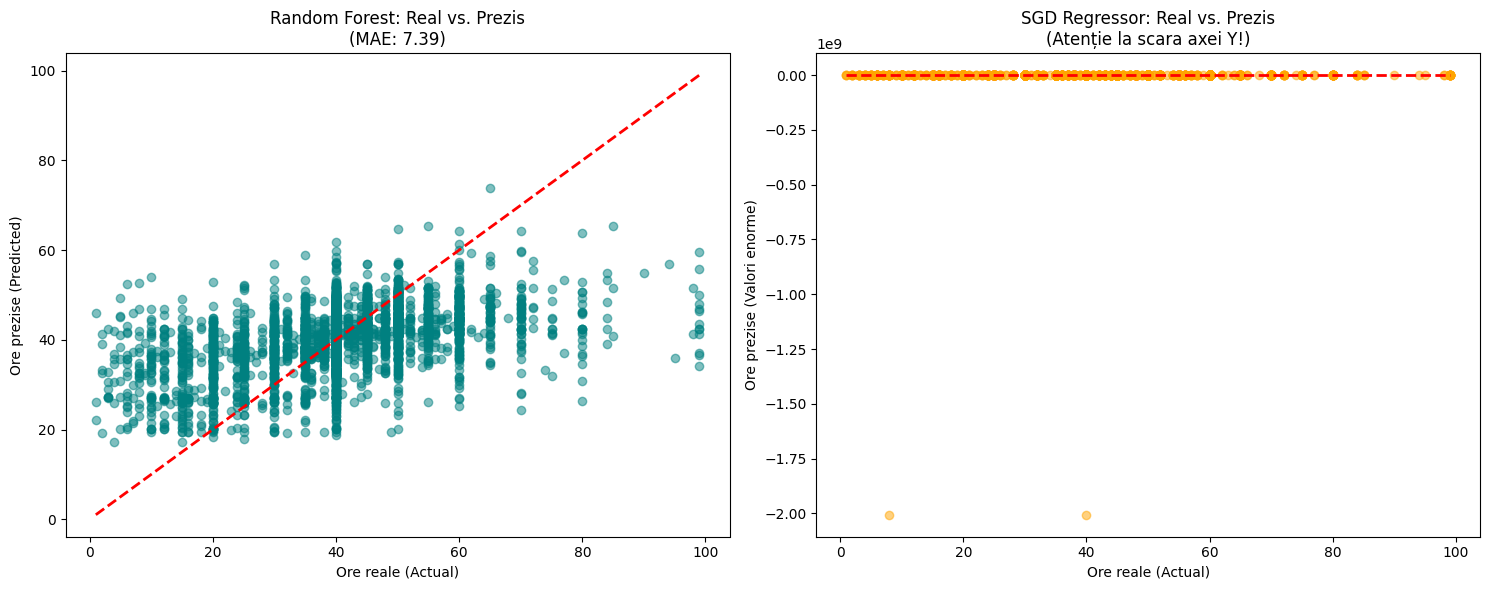

In [26]:
import matplotlib.pyplot as plt

# 1. Obținem predicțiile pentru ambele modele
rf_preds = trained_models["Random_Forest"].predict(X_val)
sgd_preds = trained_models["SGD_Regressor"].predict(X_val)

# 2. Creăm spațiul pentru cele două grafice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- Grafic 1: Random Forest ---
ax1.scatter(y_val, rf_preds, alpha=0.5, color='teal')
ax1.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
ax1.set_title(f"Random Forest: Real vs. Prezis\n(MAE: {df_results.loc[df_results['Model']=='Random_Forest', 'MAE'].values[0]:.2f})")
ax1.set_xlabel("Ore reale (Actual)")
ax1.set_ylabel("Ore prezise (Predicted)")

# --- Grafic 2: SGD Regressor ---
ax2.scatter(y_val, sgd_preds, alpha=0.5, color='orange')
ax2.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
ax2.set_title(f"SGD Regressor: Real vs. Prezis\n(Atenție la scara axei Y!)")
ax2.set_xlabel("Ore reale (Actual)")
ax2.set_ylabel("Ore prezise (Valori enorme)")

plt.tight_layout()

Observam ca modelul Random Forest are o majoritate a punctelor concentrate intr-un nor situat intre aproximativ 18 si 54 ore de lucru prezise. Acest lucru sugerează că modelul a învățat să prezică valori singur, dar apropiate de media de 40 ore identificata in cadrul task 2. Modelul esueaza sa urmeze linia ideala, astfel, in loc sa prezica mai putine ore pentru cazurile mai mici de 20, tinde sa supraestimeze pentru a fi mai aproape de medie, iar in cazul valorilor mari extreme, tinde sa subestimeze.

In graficul modelul SGD Regressor putem observa cum valorile generate sunt extrem de mari, de ordinul miliardelor, ceea ce indica din prima o problema: nu este fizic posibil ca un om sa poata lucra saptamanal atatea ore, totalul orelor dintr-o saptamana fiind incomparabile cu valorile modelului. Punctele situate la -2 ofera informatii despre faptul ca algoritmul nu a reusit sa gaseasca minimul functiei si a sarit peste acest pas din cauza learning rate ului pea mare. Linia dreapta de puncte alaturate liniei ideale reprezinta cel mai probabil o iluzie creata de limitele graficului.

##### Experimentation

In [ ]:
# Cream interactiuni intre variabilele numerice

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

print(f"Număr de trăsături după interacțiuni: {X_train_poly.shape[1]}")

Număr de trăsături după interacțiuni: 528


In [ ]:
# Modelele imbunatatite

from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

experiment_results = []

# Baseline 

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
mae_b, mse_b, rmse_b, r2_b = get_metrics(y_val, dummy.predict(X_val))
experiment_results.append({
    "Model": "Baseline (Mean)", "MAE": mae_b, "MSE": mse_b, "RMSE": rmse_b, "R2": r2_b
})

tuned_models = {
    "SGD_Tuned": SGDRegressor(learning_rate='adaptive', eta0=0.01, max_iter=2000, random_state=42),
    "Ridge_Tuned": Ridge(alpha=0.1),
    "Lasso_Tuned": Lasso(alpha=0.01),
    "DecisionTree_Tuned": DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42),
    "RandomForest_Tuned": RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
}

for name, model in tuned_models.items():
    if "Ridge" in name or "Lasso" in name:
        X_tr, X_v = X_train_poly, X_val_poly
    else:
        X_tr, X_v = X_train, X_val
    
    model.fit(X_tr, y_train)
    preds = model.predict(X_v)
    
    mae, mse, rmse, r2 = get_metrics(y_val, preds)
    experiment_results.append({
        "Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2
    })

# Afișare rezultate experiment

df_exp = pd.DataFrame(experiment_results)
print(df_exp.sort_values(by="MAE"))

                Model   MAE     MSE   RMSE     R2
3         Lasso_Tuned 7.364 113.995 10.677  0.241
5  RandomForest_Tuned 7.380 116.298 10.784  0.225
2         Ridge_Tuned 7.413 114.832 10.716  0.235
0     Baseline (Mean) 7.496 150.155 12.254 -0.000
4  DecisionTree_Tuned 7.516 119.503 10.932  0.204
1           SGD_Tuned 7.574 118.106 10.868  0.213


Pe baza EDA din Task 2, unde am observat o distributie long-tail, si posibile coliniaritati am decis sa creez termeni de interactiune pentru a ajuta modelele liniare sa capteze aceste nelinearitati

In [ ]:
from sklearn.linear_model import HuberRegressor

# Lista pentru rezultatele noului experiment

final_experiment_results = []

# Baseline-ul pentru referinta constanta

final_experiment_results.append({
    "Model": "Baseline (Mean)", "MAE": mae_b, "MSE": mse_b, "RMSE": rmse_b, "R2": r2_b
})

# Model nou

ultimate_models = {
    # SGD cu Huber Loss - special pentru a gestiona outliers fără să explodeze
    "SGD_Huber": SGDRegressor(loss='huber', epsilon=1.35, learning_rate='adaptive', eta0=0.01, random_state=42),
    
    # Ridge cu o regularizare mai fină
    "Ridge_Final": Ridge(alpha=0.05),
    
    # Lasso - încercăm să păstrăm mai multe variabile polinomiale
    "Lasso_Final": Lasso(alpha=0.005),
    
    # Decision Tree - limităm adâncimea dar creștem eșantionul minim
    "DecisionTree_Final": DecisionTreeRegressor(max_depth=12, min_samples_leaf=20, random_state=42),
    
    # RandomForest - "Forța Brută": mai mulți arbori pentru stabilitate
    "RandomForest_Final": RandomForestRegressor(n_estimators=200, max_depth=12, min_samples_leaf=10, n_jobs=-1, random_state=42)
}

for name, model in ultimate_models.items():
    # Polinomial doar pentru modele liniare
    if "Ridge" in name or "Lasso" in name or "Huber" in name:
        X_tr, X_v = X_train_poly, X_val_poly
    else:
        X_tr, X_v = X_train, X_val
    
    model.fit(X_tr, y_train)
    preds = model.predict(X_v)
    
    mae, mse, rmse, r2 = get_metrics(y_val, preds)
    final_experiment_results.append({
        "Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2
    })

df_ultimate = pd.DataFrame(final_experiment_results)
print(df_ultimate.sort_values(by="MAE"))

                Model   MAE     MSE   RMSE     R2
1           SGD_Huber 6.992 118.364 10.880  0.212
5  RandomForest_Final 7.349 114.886 10.719  0.235
3         Lasso_Final 7.383 114.304 10.691  0.239
2         Ridge_Final 7.413 114.833 10.716  0.235
4  DecisionTree_Final 7.463 117.350 10.833  0.218
0     Baseline (Mean) 7.496 150.155 12.254 -0.000


In urma mai multor incercari, am reusit sa ajung la o varianta finala in care toate modelele au valoarea MAE mai mica ca media (7.496). In acest caz, SGD_Huber a reusit sa scada sub pragul de 7 ore (6.992), fiind cel mai reusit model de pana acum, oferind cea mai mare precizie.

##### Evaluare finala

In [ ]:
#Transformam setul de testare

X_test_poly = poly.transform(X_test)

In [40]:
# Predictie finala cu cel mai bun model

final_model = ultimate_models["SGD_Huber"]
final_preds = final_model.predict(X_test_poly)

mae_test, mse_test, rmse_test, r2_test = get_metrics(y_test, final_preds)

print("=== REZULTATE FINALE PE SETUL DE TEST (X_test) ===")
print(f"MAE:  {mae_test:.3f}")
print(f"RMSE: {rmse_test:.3f}")
print(f"R2:   {r2_test:.3f}")

=== REZULTATE FINALE PE SETUL DE TEST (X_test) ===
MAE:  7.055
RMSE: 11.061
R2:   0.200


Datorita schimbarii loss='huber' modelul a reusit sa ignore partial influenta distorsionata a valorilor de 99 ore (outlier deja identificat la task 2), scazand MAE sub media statistica (7.496). Faptul ca am introdus termeni de interactiune polinominala a lasat modelul sa gaseasca relatii mai complexe pentru a calcula programul de lucru.
Modelul final a fost imbunatatit semnificativ fata de incercarea initiala unde singurul model de Random Forest care a reusit sa obtina un rezultat mai mic ca media avea MAE 7.393 (o diferenta de 0.338 unitati).

Scorul MAE de 7.055 pe setul de test este putin mai mare fata de scorul MAE al setului de validare, 6.992, insa diferenta nu este una mare, modelul avand rezultate apropiate unele fata de celelalte deoarece modelul a invatat tipare prezente in date, nu particularitati prezente in acestea. R squared ne arata ca acest model explica 20% din variatia orelor de munca, sugerand faptul ca probabil exista alte variabile ce pot explica mult mai bine numarul orelor lucrate pe saptamana.

Am ales ca metrica principala MAE pentru analiza deoarece ofera cea mai intuitiva interpretare: cu cate ore a gresit modelul in medie fata de orele lucrate si nu gestioneaza disproportionat valorile extreme

##### Tabel final

In [43]:
#  Convertim listele de rezultate în DataFrames

df_base = pd.DataFrame(results) # Baseline
df_exp_1 = pd.DataFrame(experiment_results) # Tuning
df_ult = pd.DataFrame(final_experiment_results) # Ultimate

# Adaugam o coloana pentru a identifica etapa

df_base['Stage'] = 'Baseline'
df_exp_1['Stage'] = 'Experimentation'
df_ult['Stage'] = 'Reshaped experiment'

# Adaugam rezultatul final de pe setul de TEST

test_result = pd.DataFrame([{
    "Model": "SGD_Huber (FINAL TEST)",
    "MAE": mae_test,
    "MSE": mse_test,
    "RMSE": rmse_test,
    "R2": r2_test,
    "Stage": "Final Evaluation"
}])

# Combinam totul într-un singur tabel

df_rezultate = pd.concat([df_base, df_exp_1, df_ult, test_result], ignore_index=True)

# Afisam tabelul sortat dupa performanta (MAE)

print("=== TOATE REZULTATELE EXPERIMENTELOR ===")
display(df_rezultate.sort_values(by="MAE").reset_index(drop=True))

=== TOATE REZULTATELE EXPERIMENTELOR ===


,Model,MAE,MSE,RMSE,R2,Stage
0,SGD_Huber,6.992,118.364,10.880,0.212,Reshaped experiment
1,SGD_Huber (FINAL TEST),7.055,122.349,11.061,0.200,Final Evaluation
2,RandomForest_Final,7.349,114.886,10.719,0.235,Reshaped experiment
3,Lasso_Tuned,7.364,113.995,10.677,0.241,Experimentation
4,RandomForest_Tuned,7.380,116.298,10.784,0.225,Experimentation
5,Lasso_Final,7.383,114.304,10.691,0.239,Reshaped experiment
6,Random_Forest,7.393,116.543,10.796,0.224,Baseline
7,Ridge_Tuned,7.413,114.832,10.716,0.235,Experimentation
8,Ridge_Final,7.413,114.833,10.716,0.235,Reshaped experiment
9,DecisionTree_Final,7.463,117.350,10.833,0.218,Reshaped experiment


In urma alcatuirii tabelului cu toate versiunile testelor si a sortarii dupa cel mai bun MAE, putem observa ca primele doua intrari sunt formate chiar din evaluarea finala si varianta ajustata a experimentului pentru a gasi cea mai buna solutie. Daca ne uitam la R patrat, putem observa ca alte modele explica putin mai bine variata numarului de ore, insa niciun model nu este foarte puternic. Se pot observa 5 modele care nu au reusit sa bata media, insa 4 dintre ele au fost alcatuite in etapa de baza, doar unul esuand cu adevarat dupa prima incercare de experiment. Cel mai mare salt de performanta a fost realizat de schimbarea functiei loss='hauber', care a permis modelului care folosea polynominal features sa ignore 'noise' ul produs de valorile extreme.